/tmp/ipykernel_136117/2673348586.py:85: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


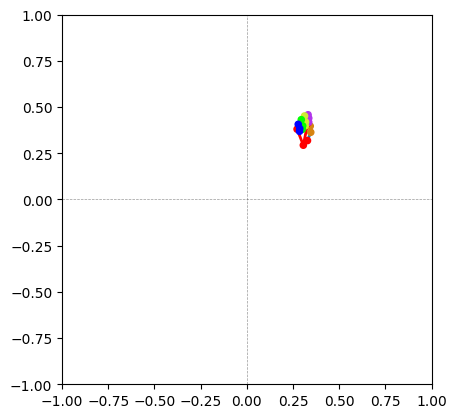

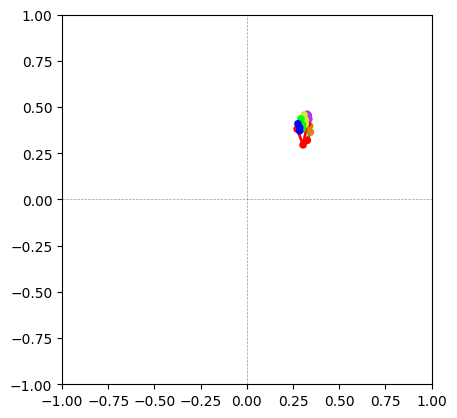

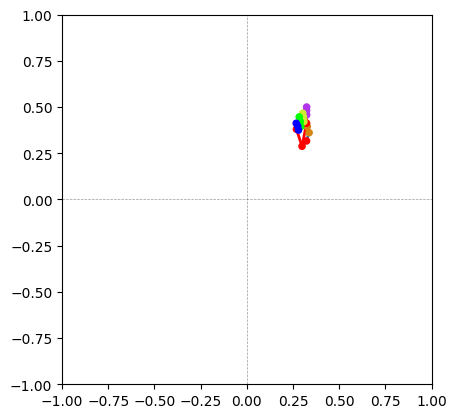

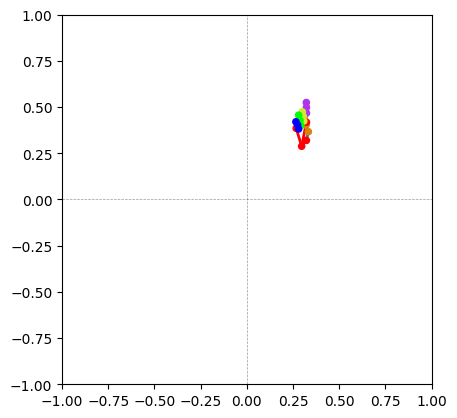

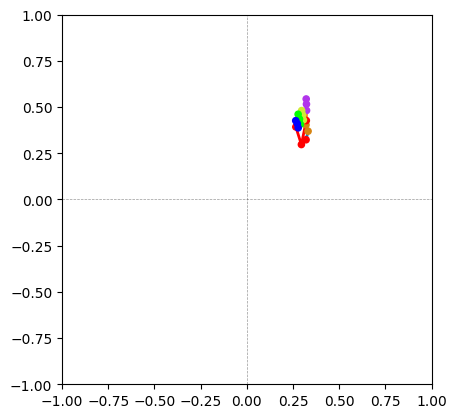

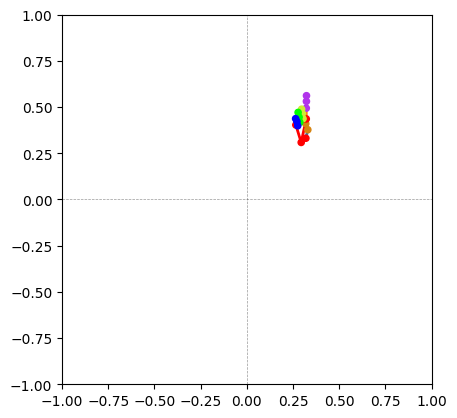

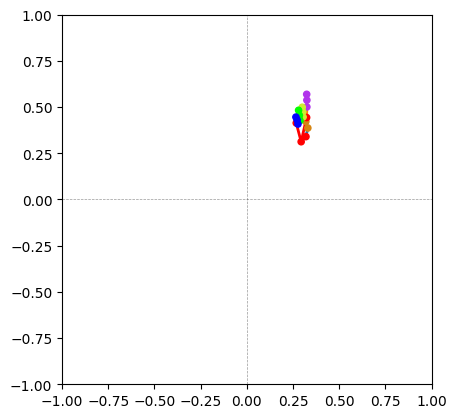

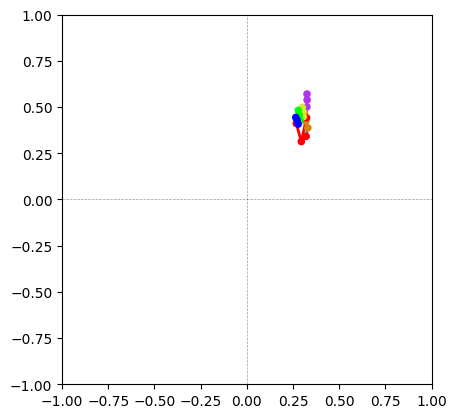

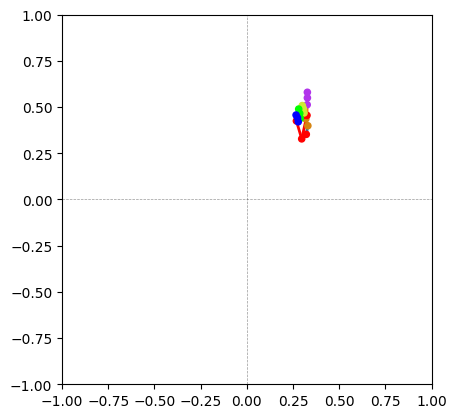

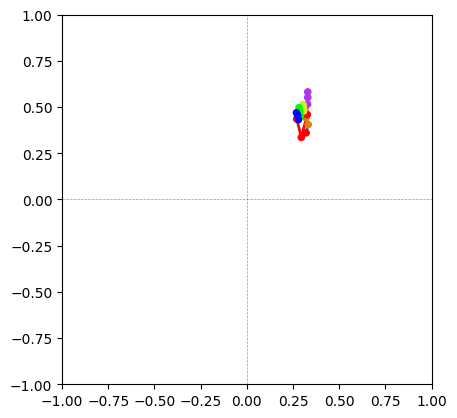

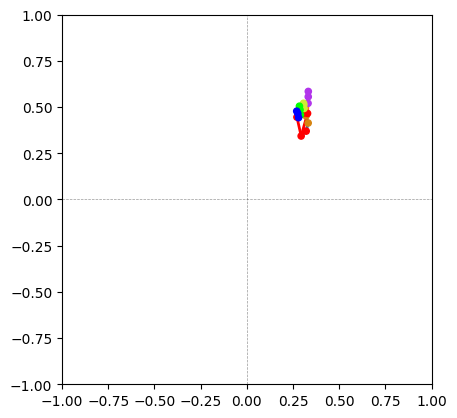

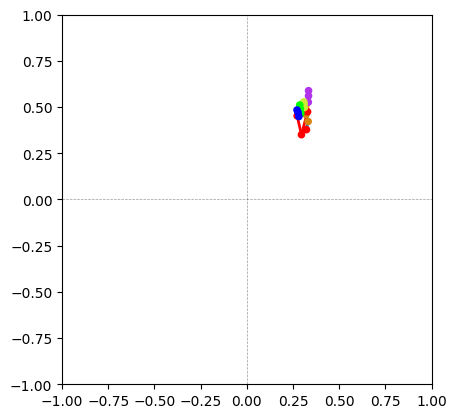

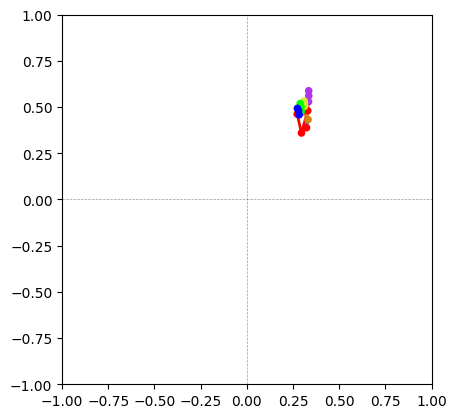

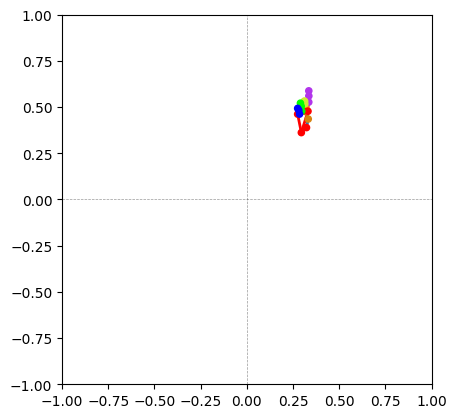

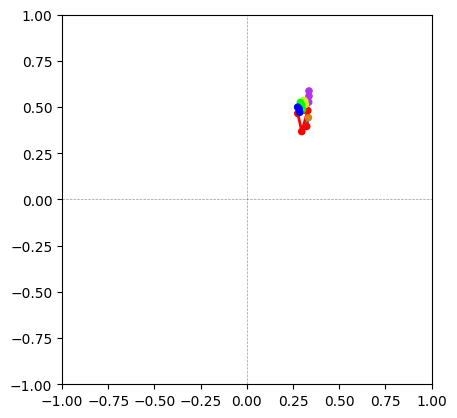

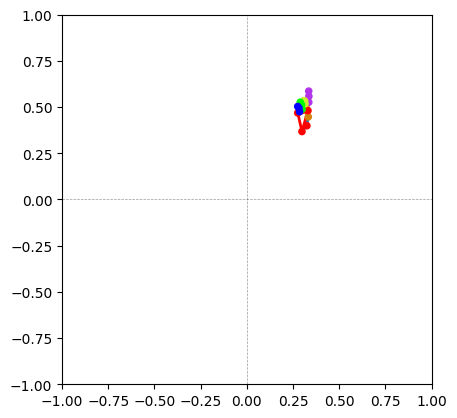

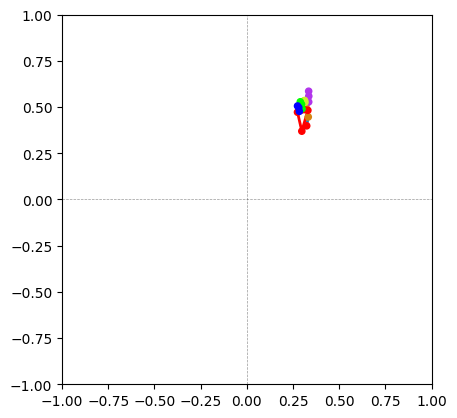

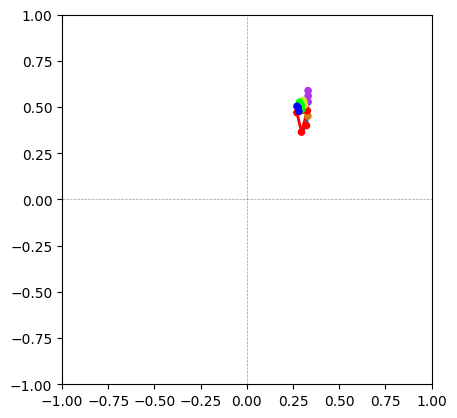

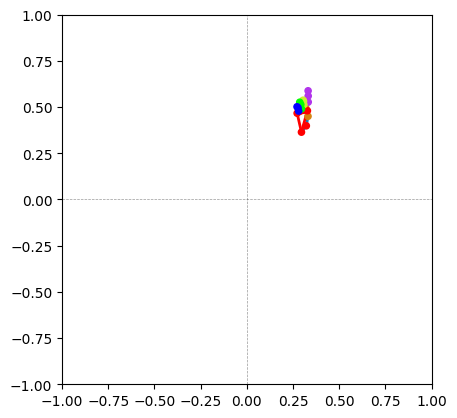

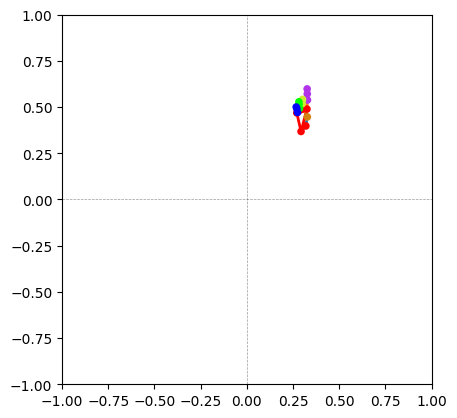

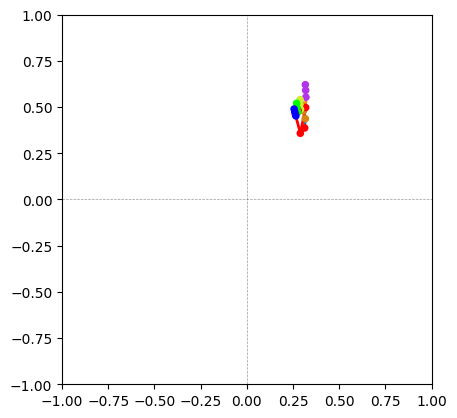

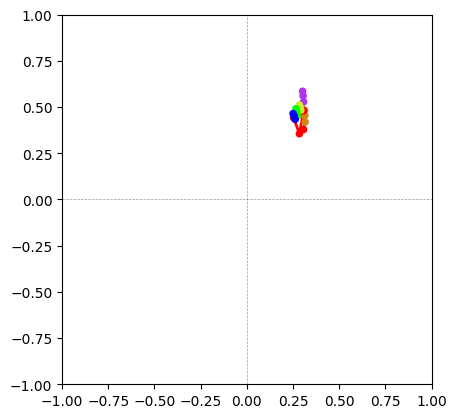

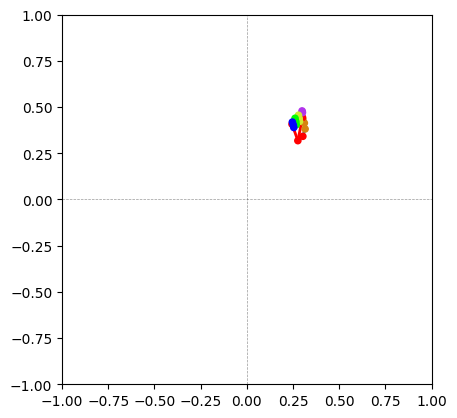

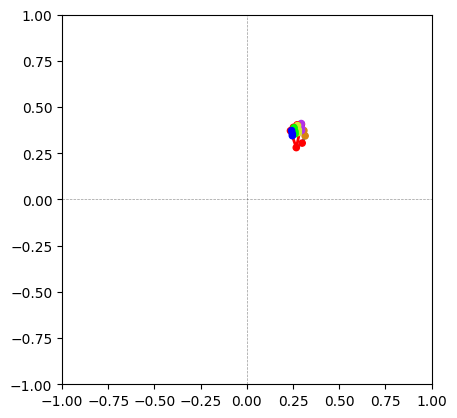

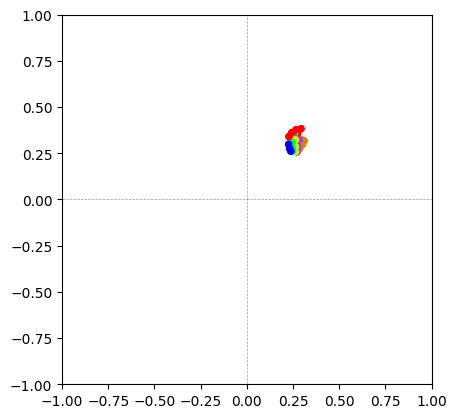

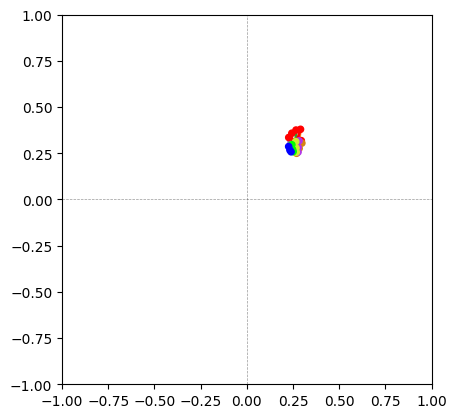

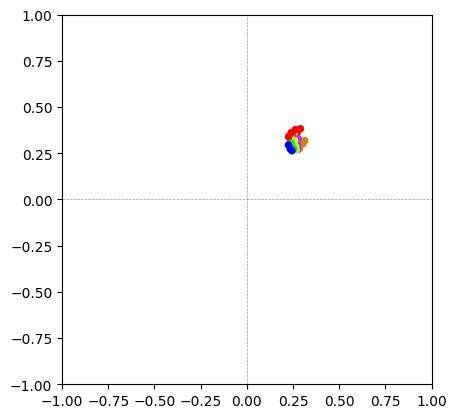

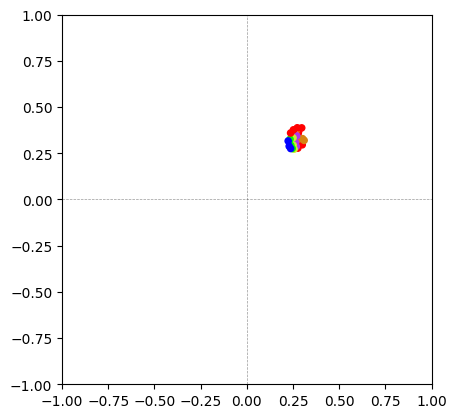

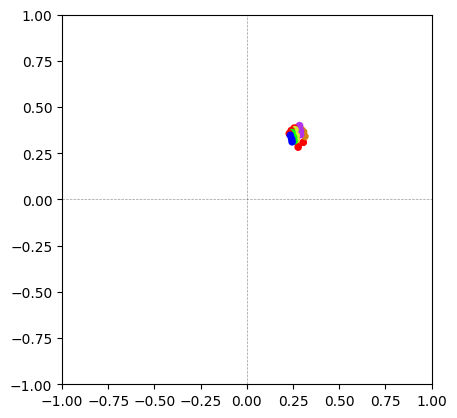

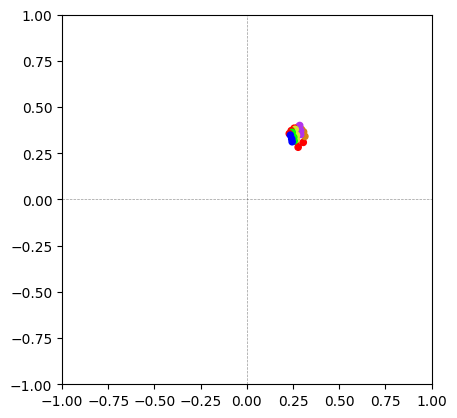

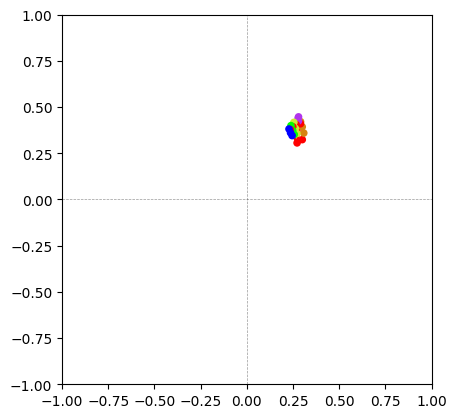

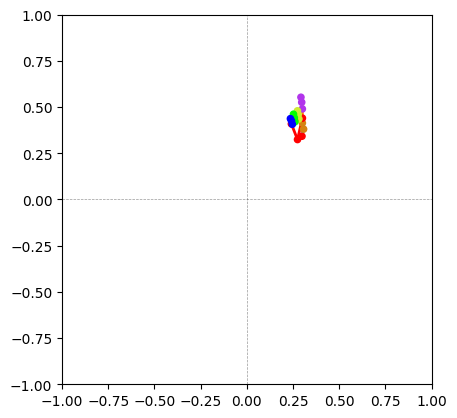

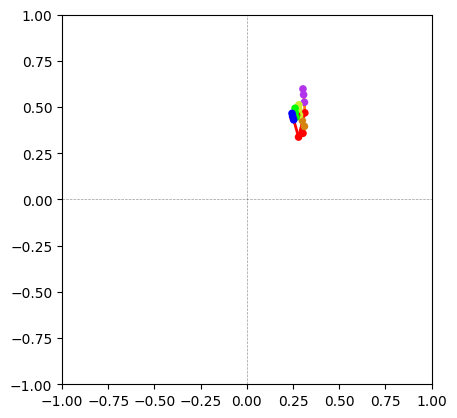

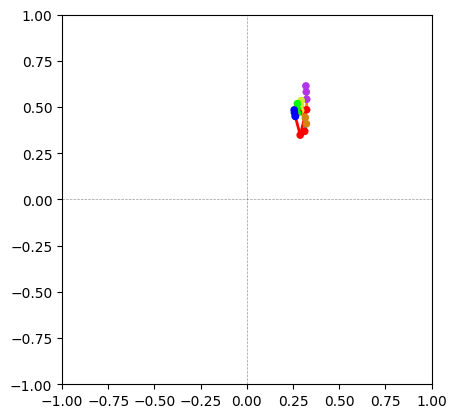

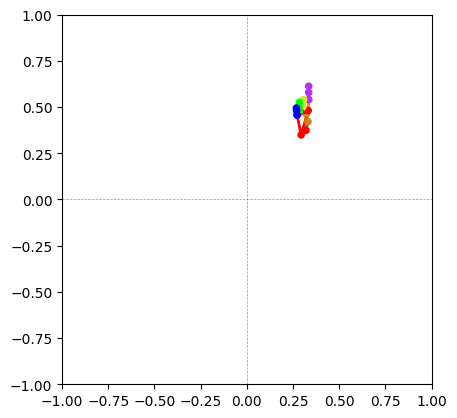

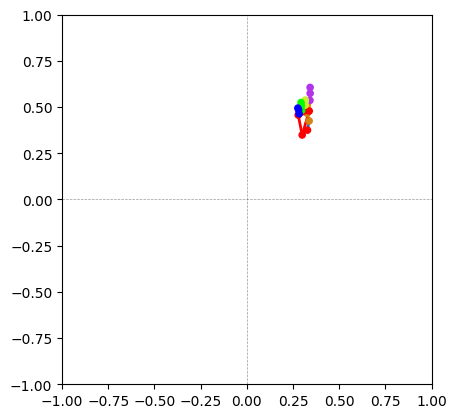

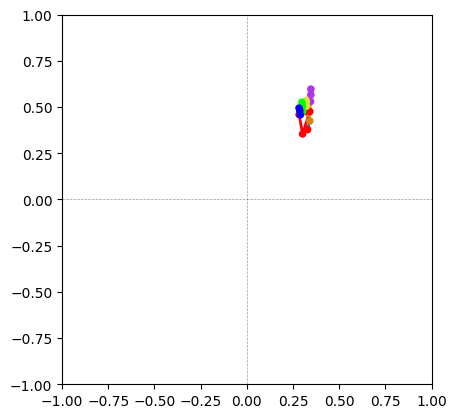

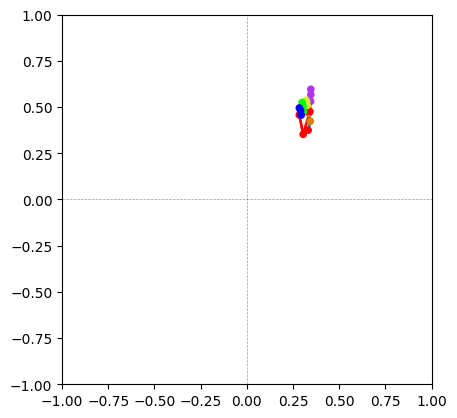

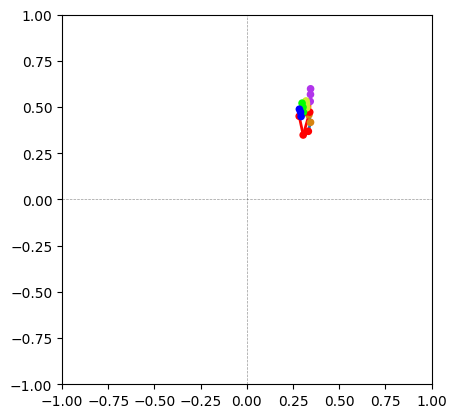

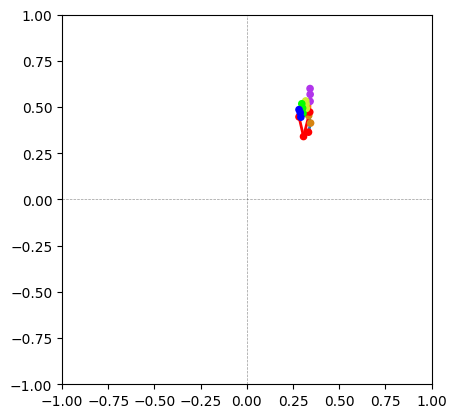

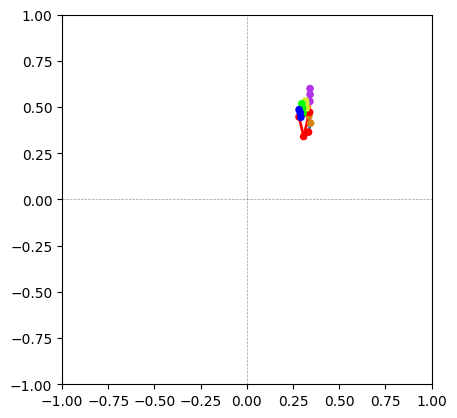

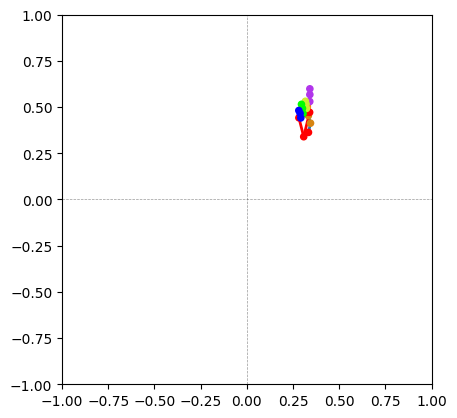

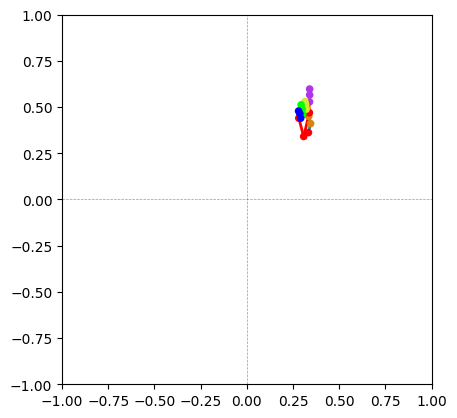

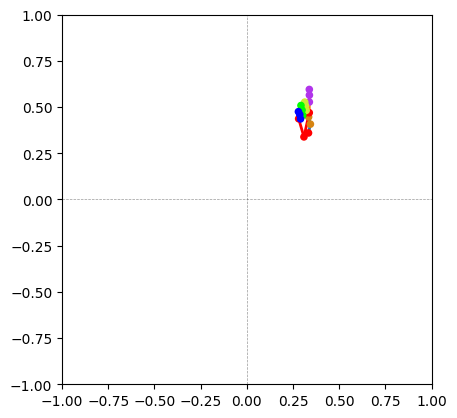

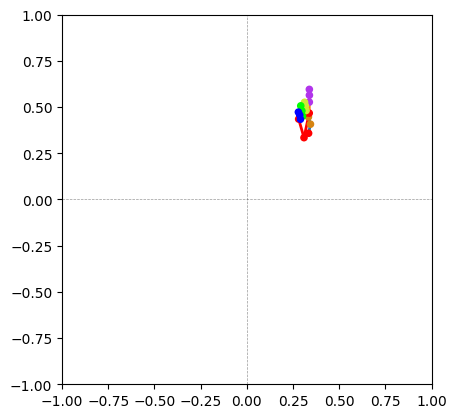

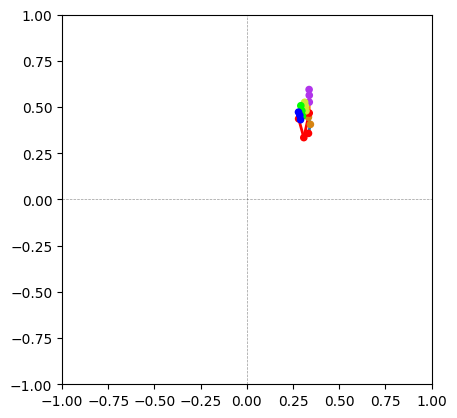

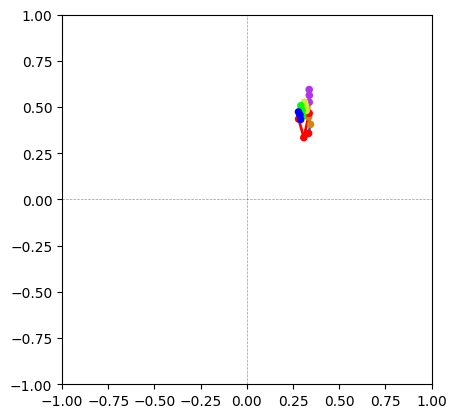

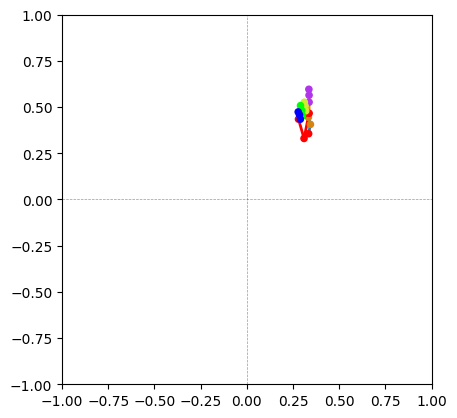

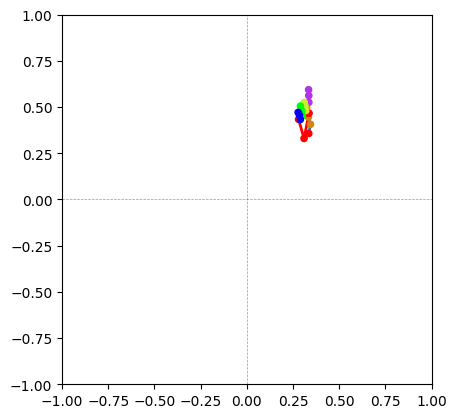

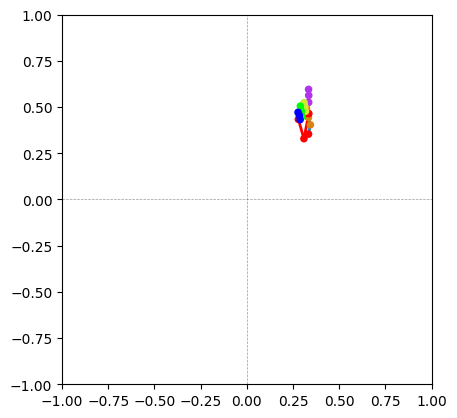

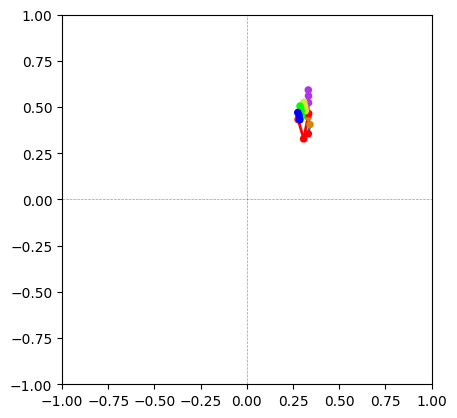

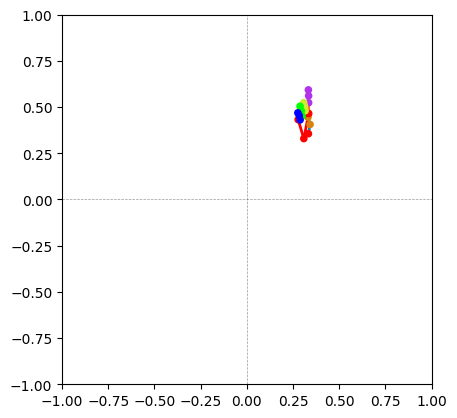

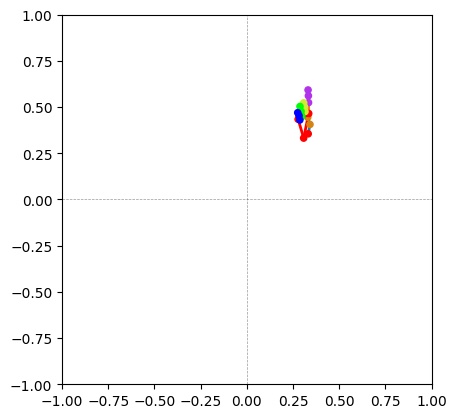

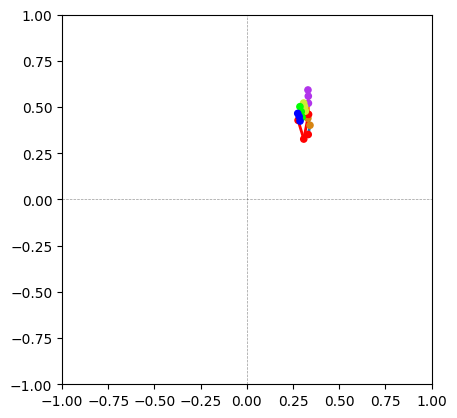

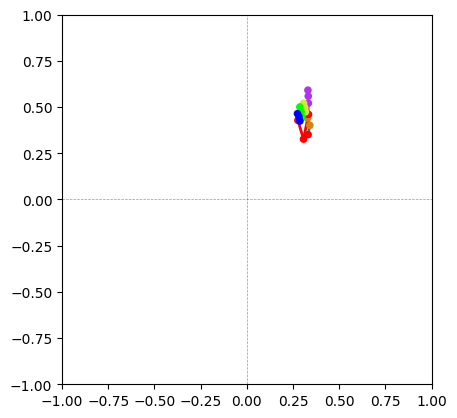

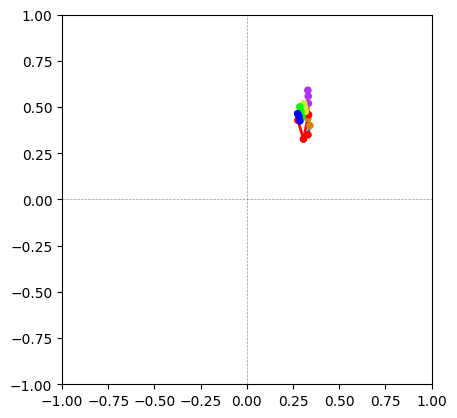

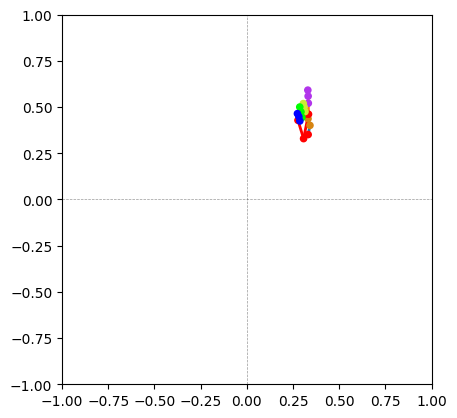

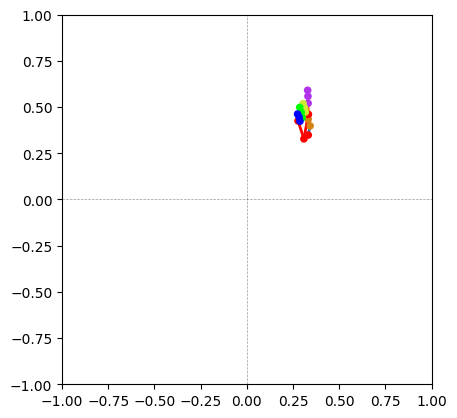

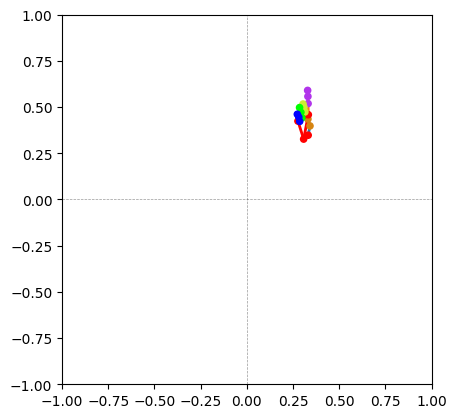

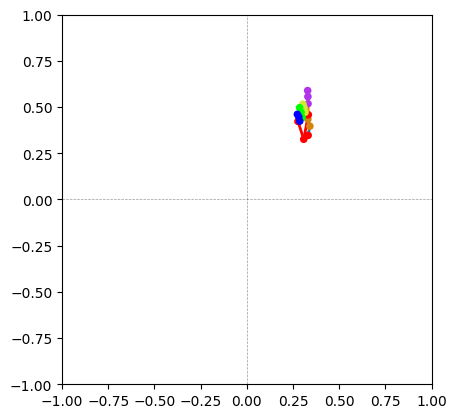

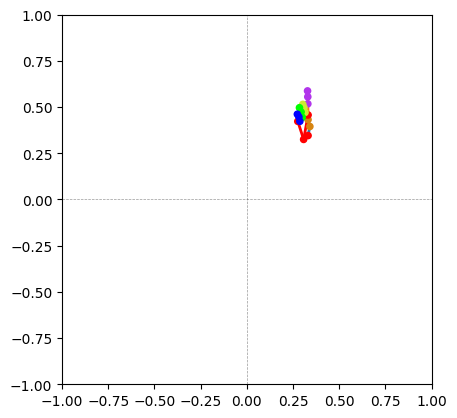

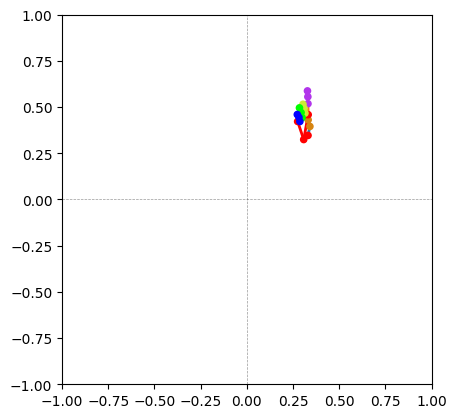

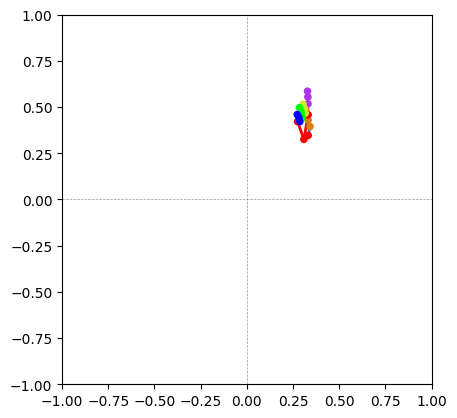

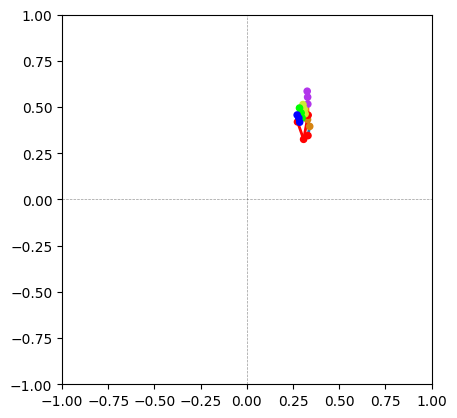

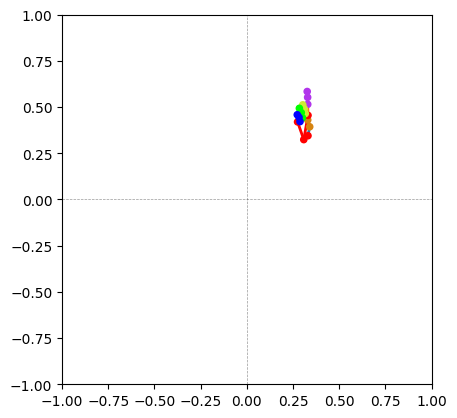

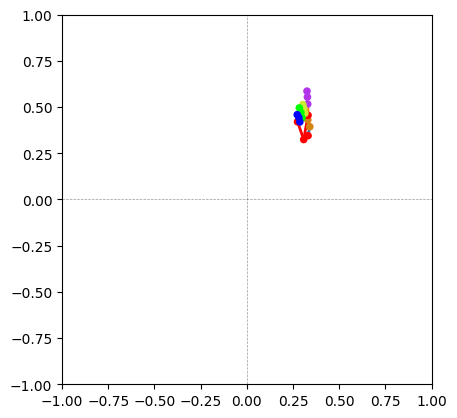

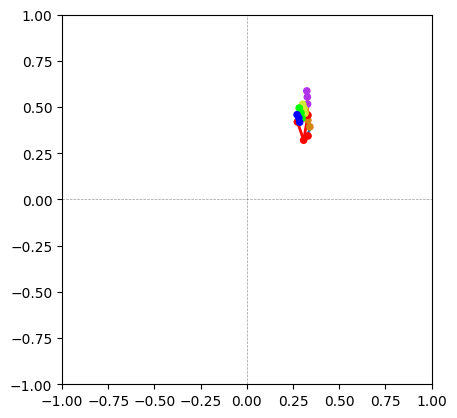

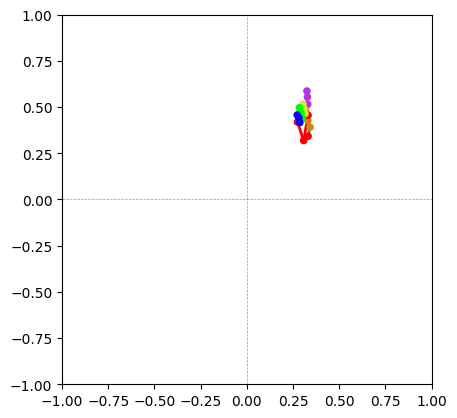

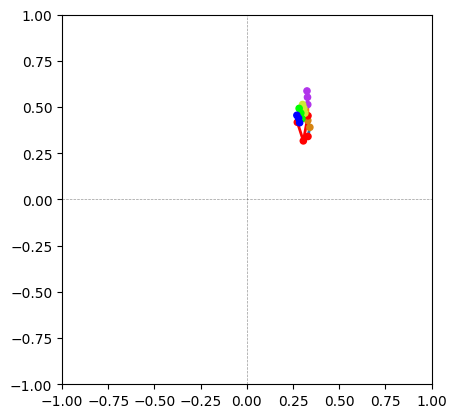

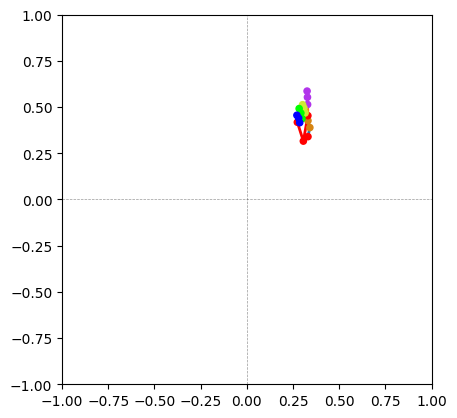

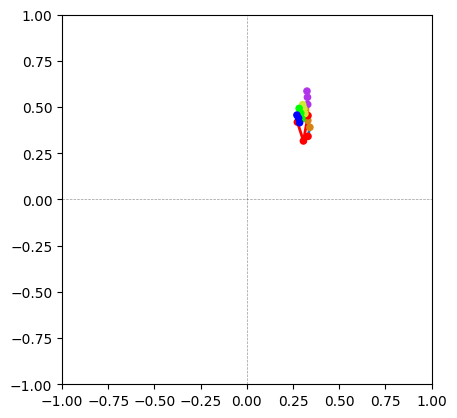

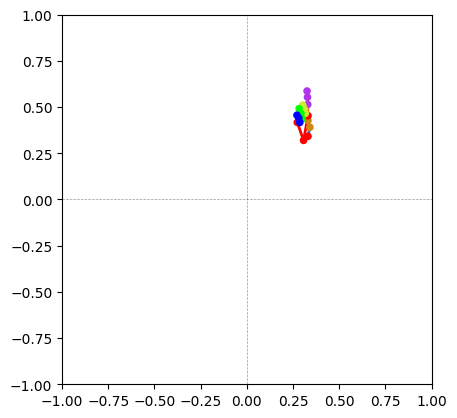

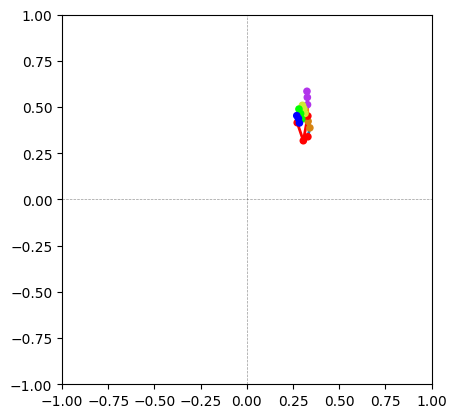

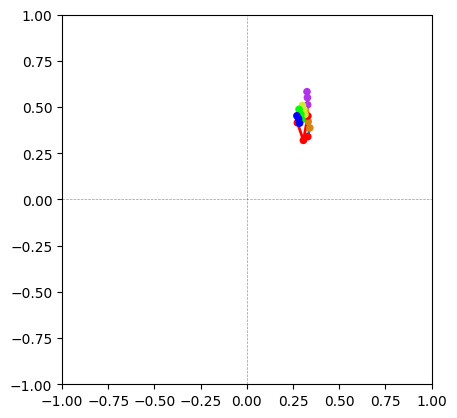

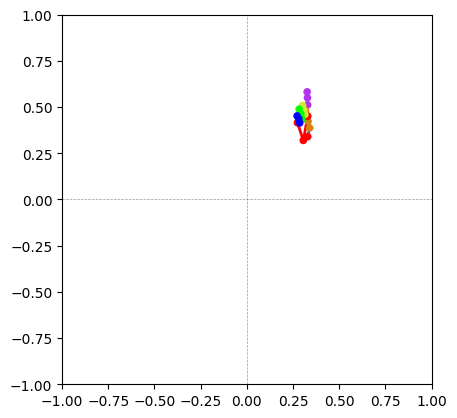

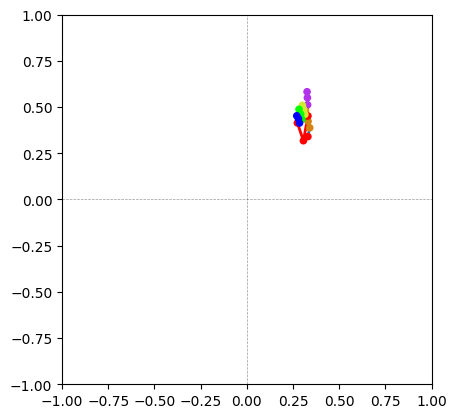

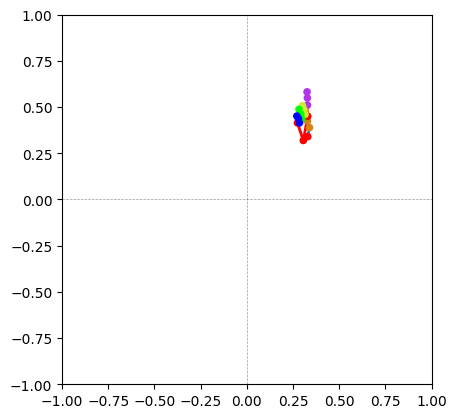

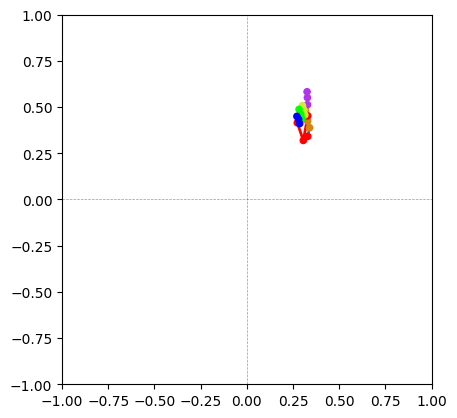

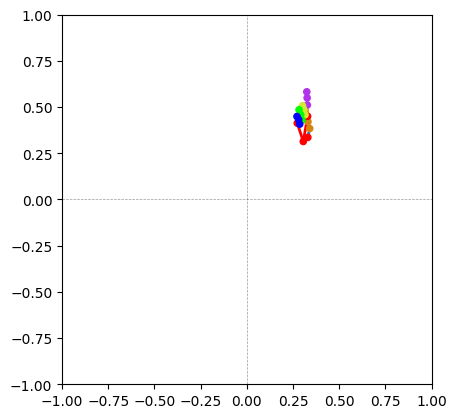

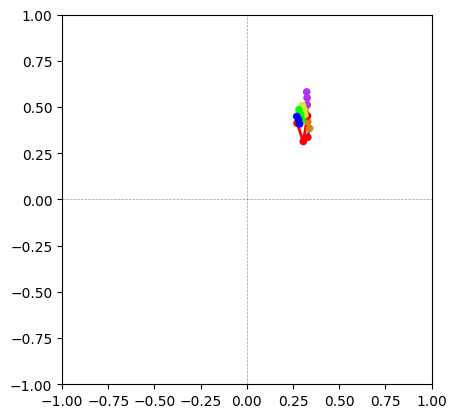

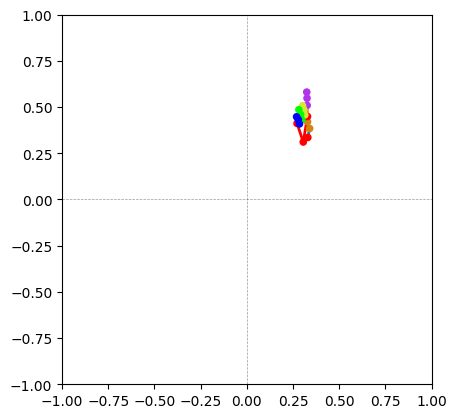

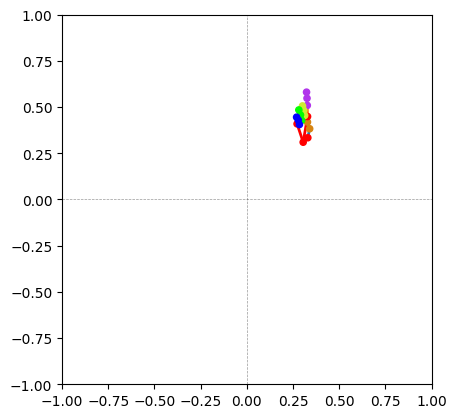

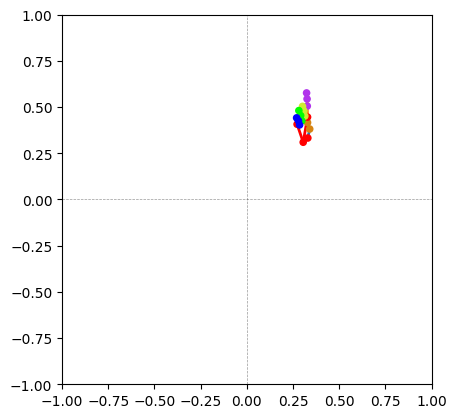

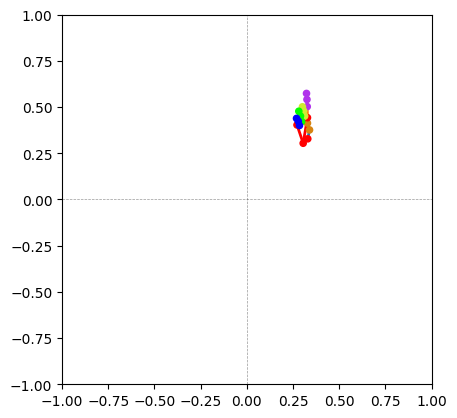

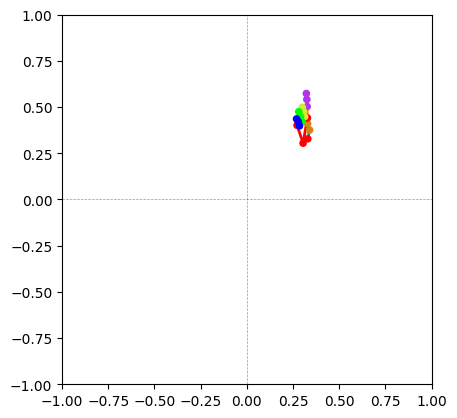

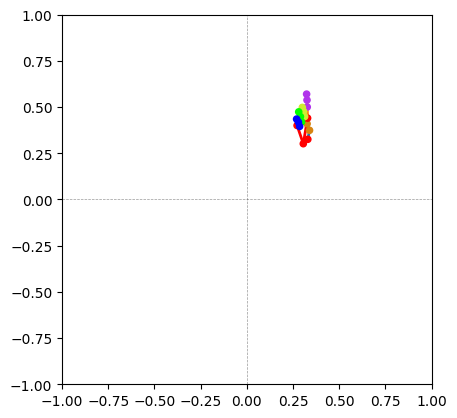

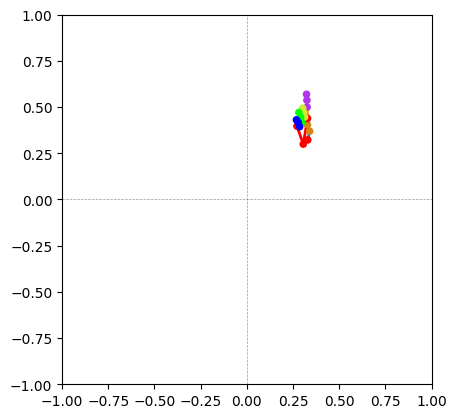

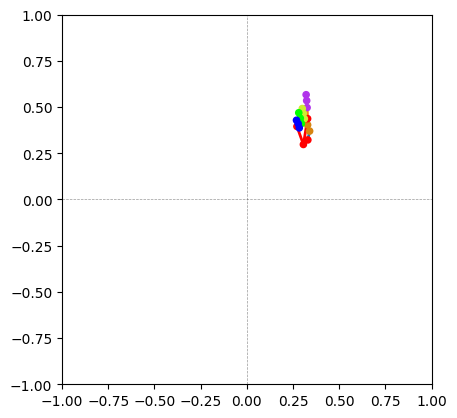

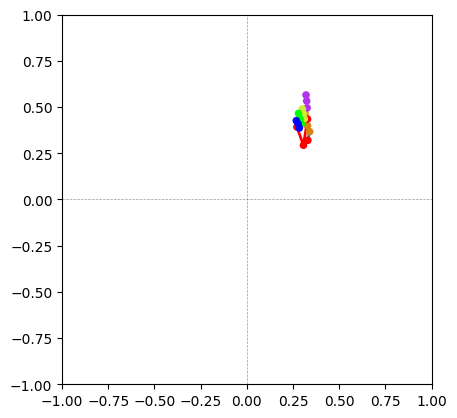

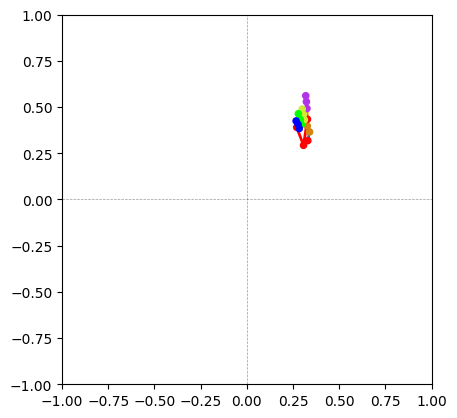

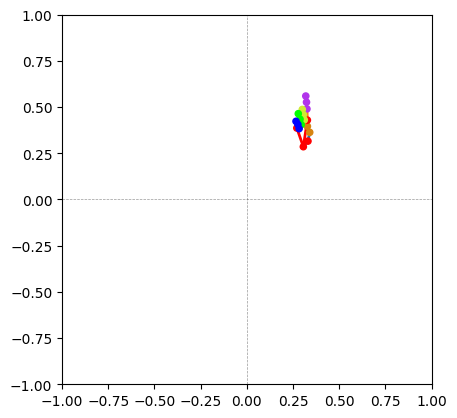

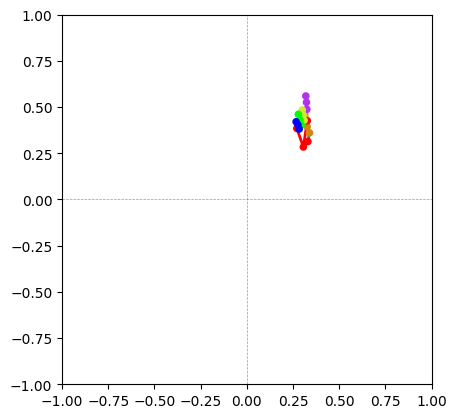

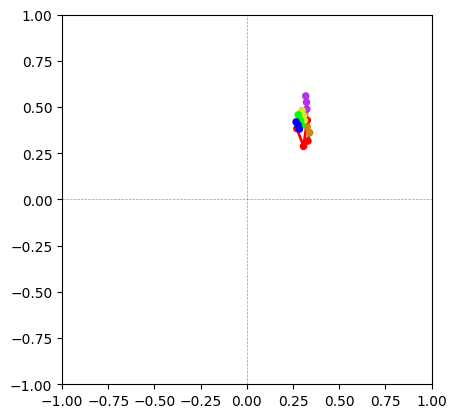

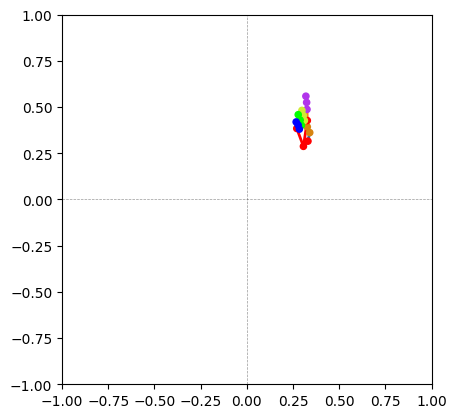

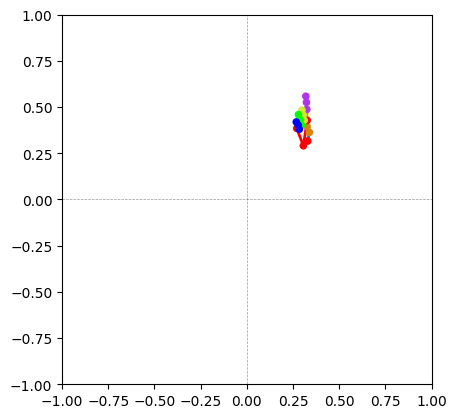

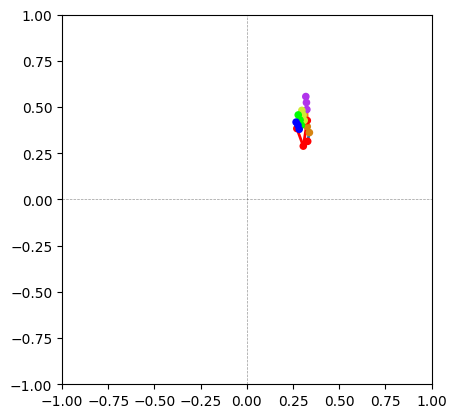

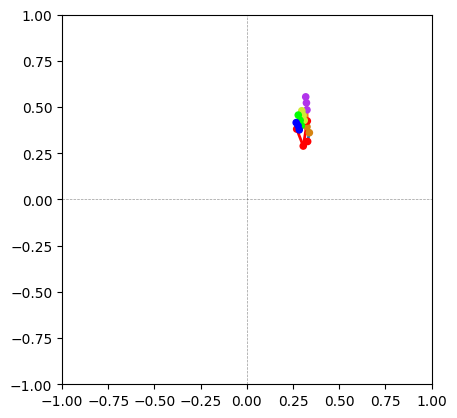

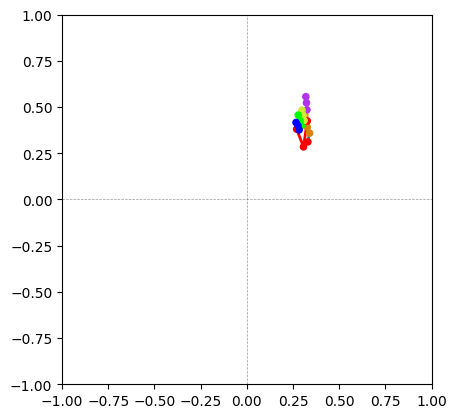

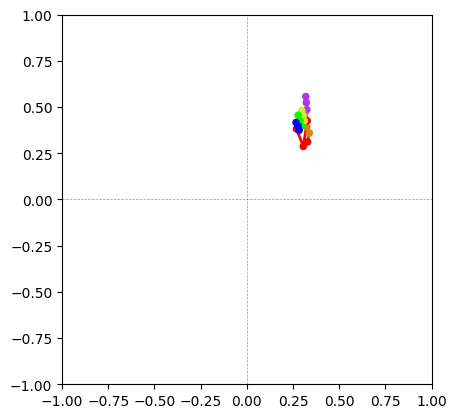

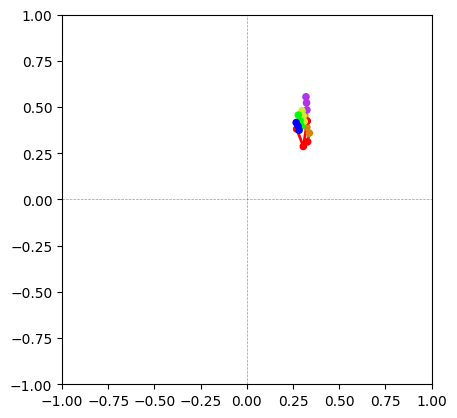

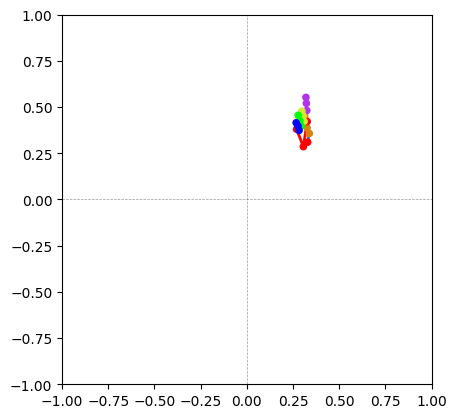

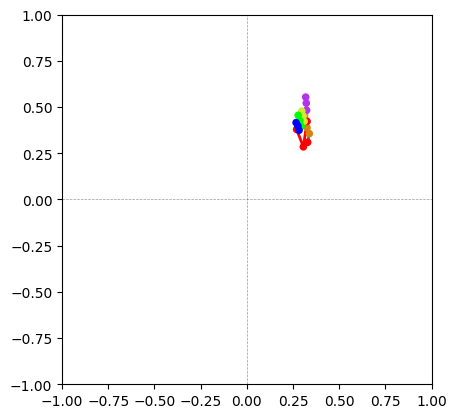

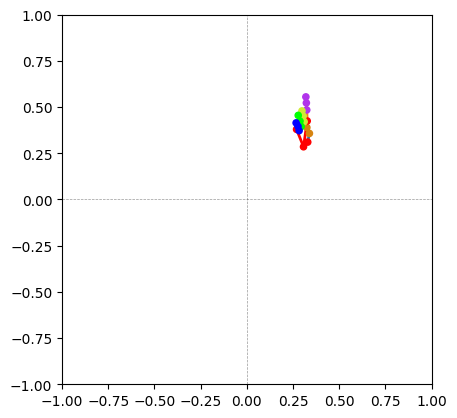

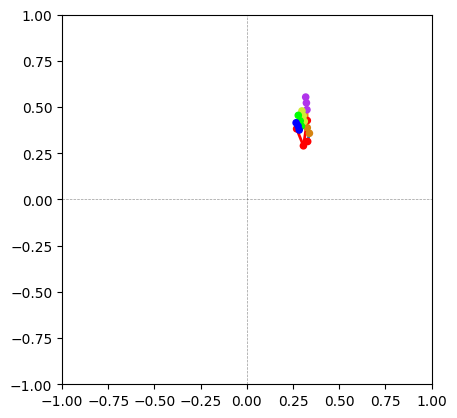

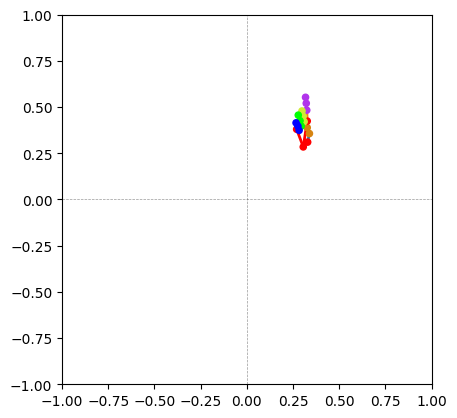

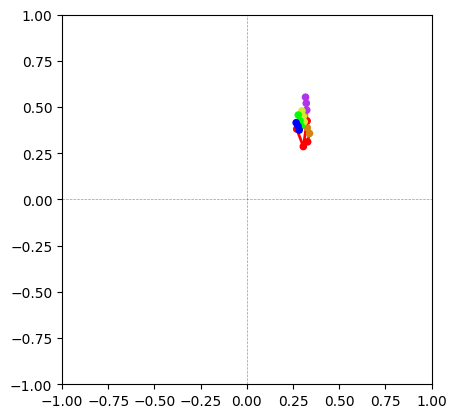

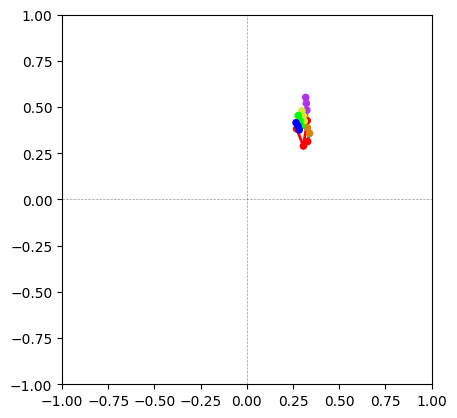

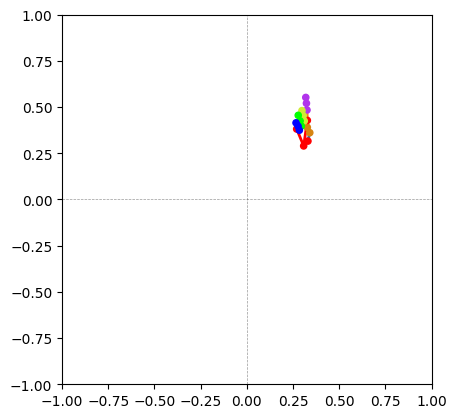

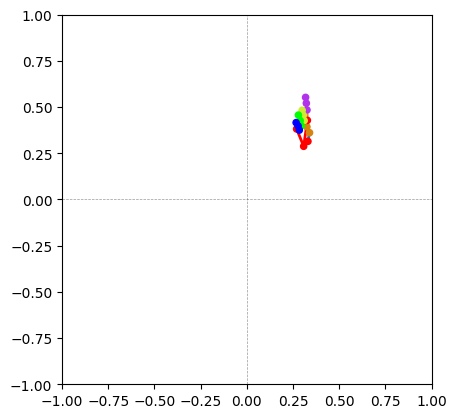

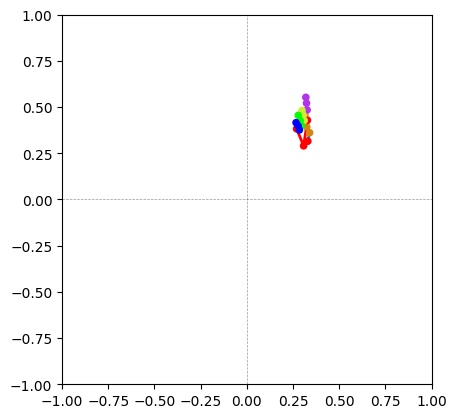

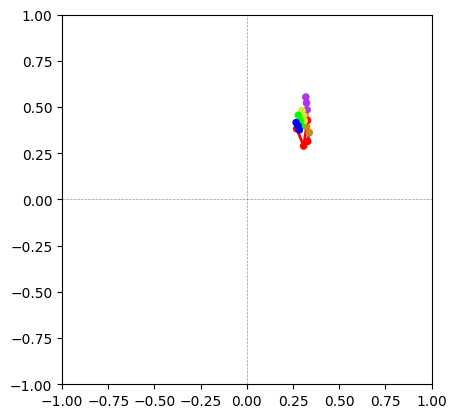

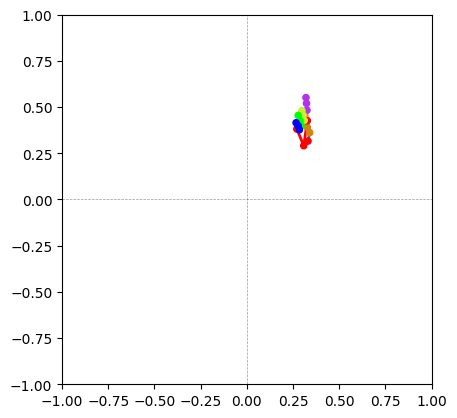

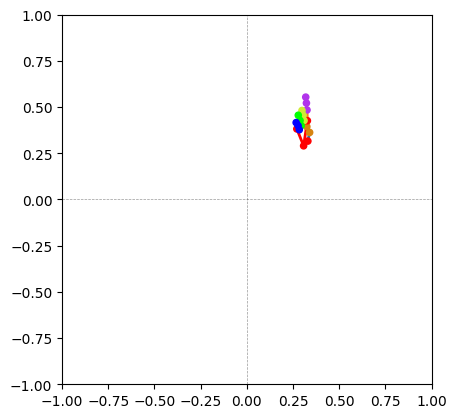

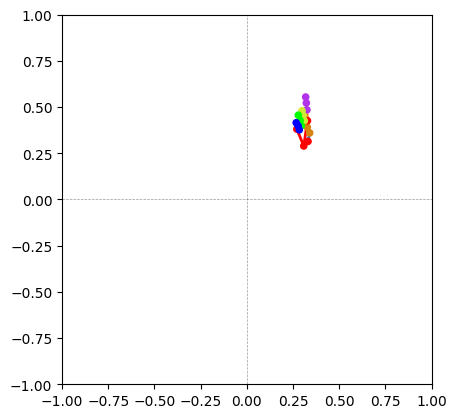

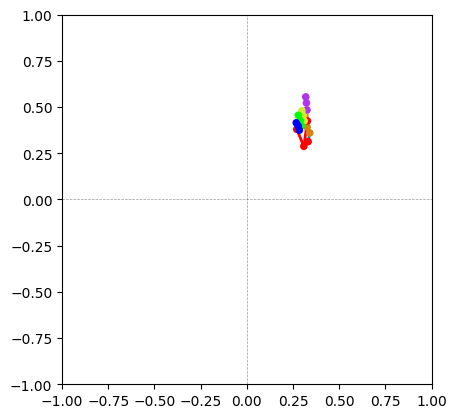

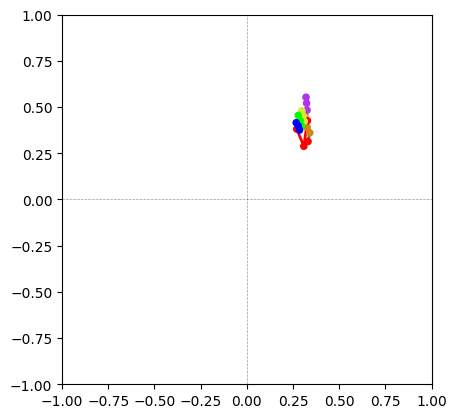

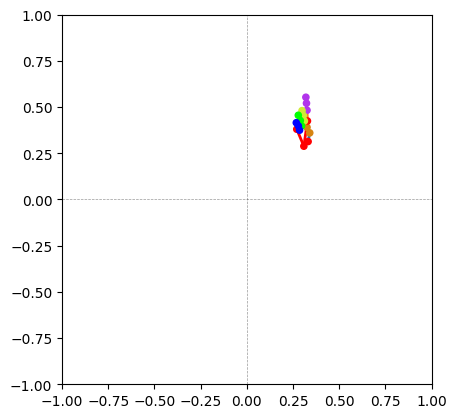

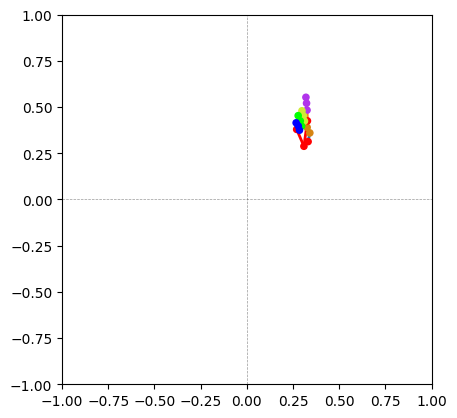

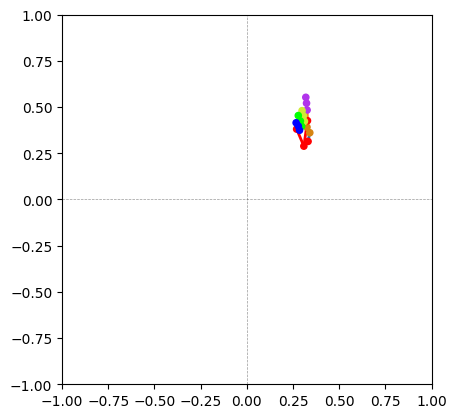

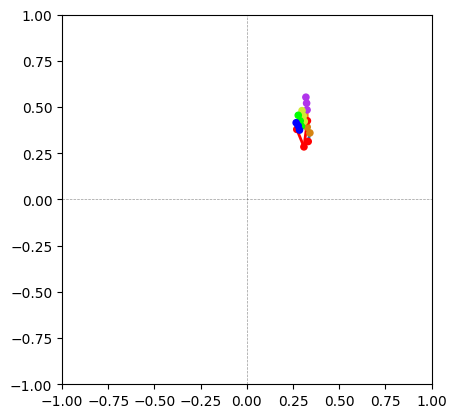

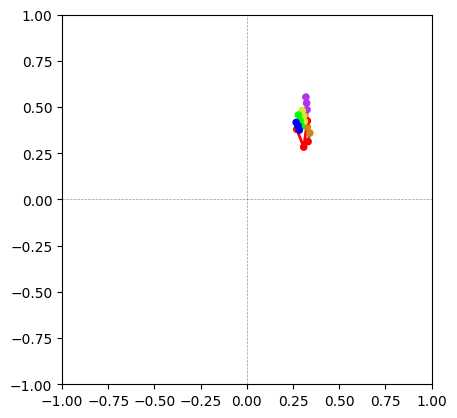

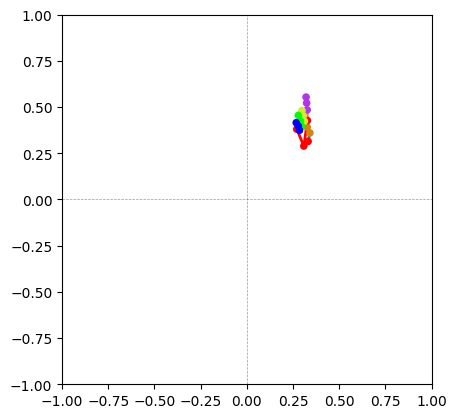

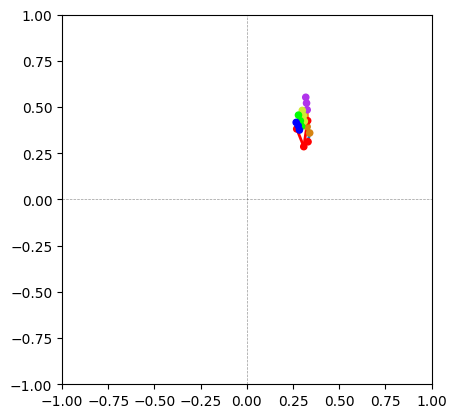

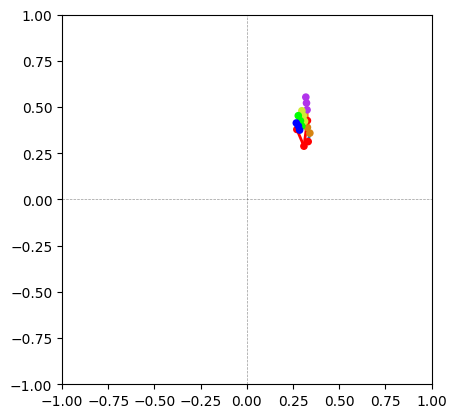

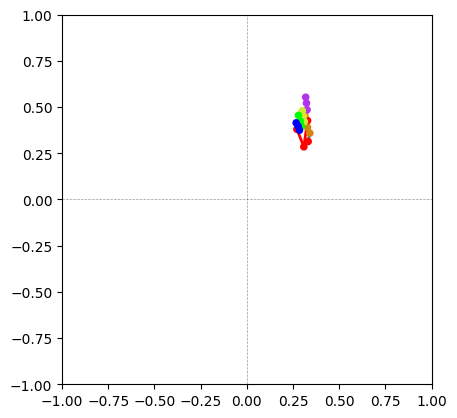

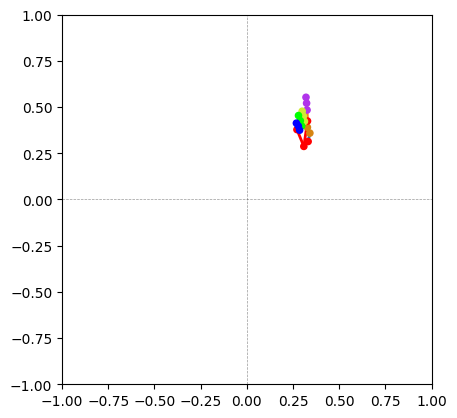

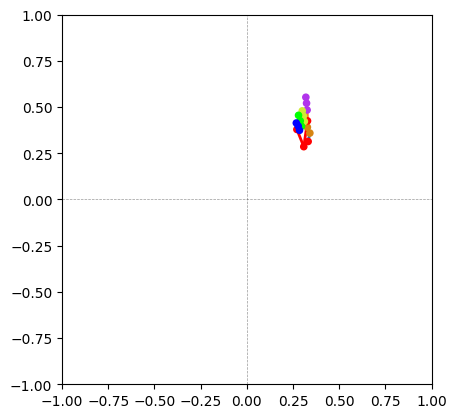

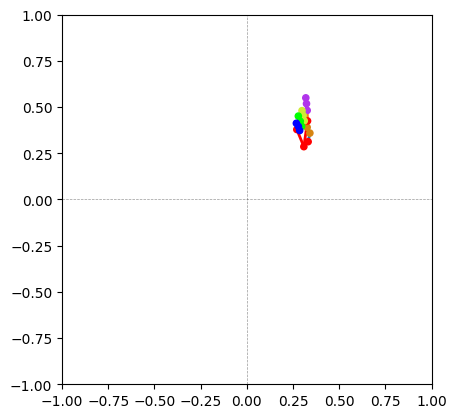

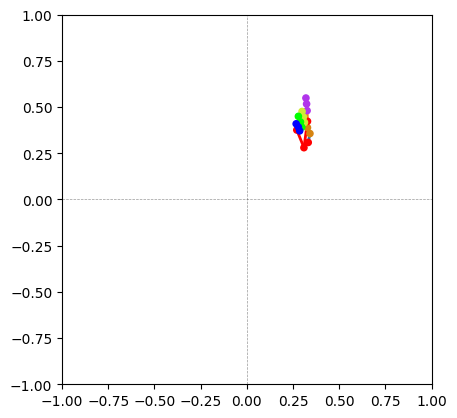

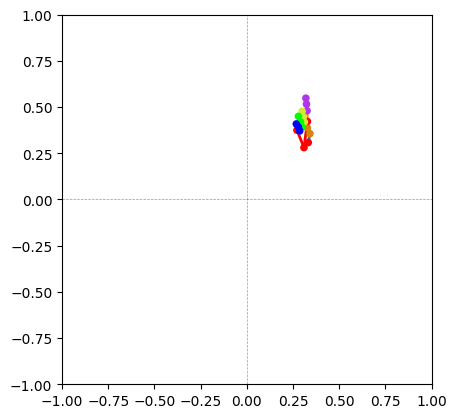

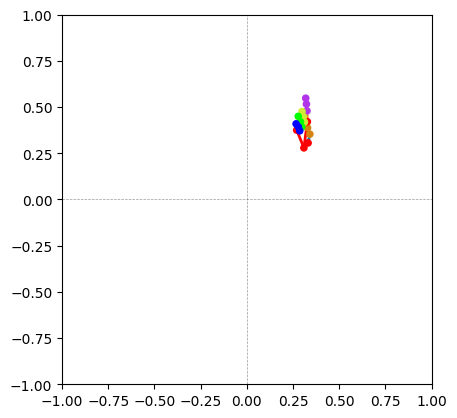

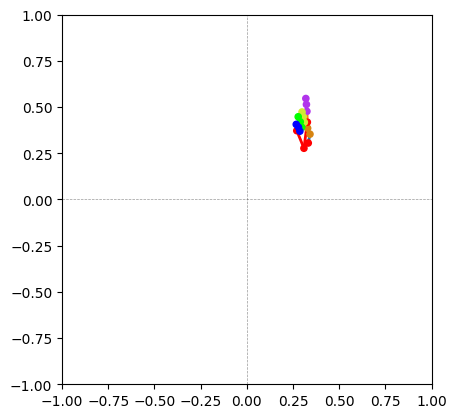

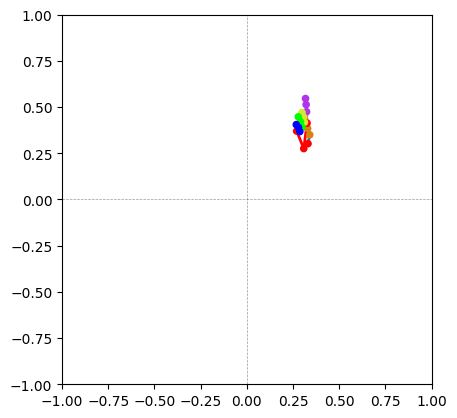

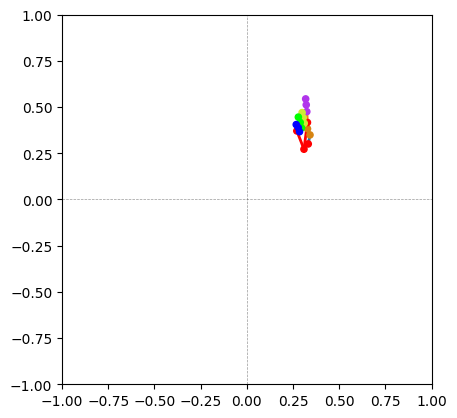

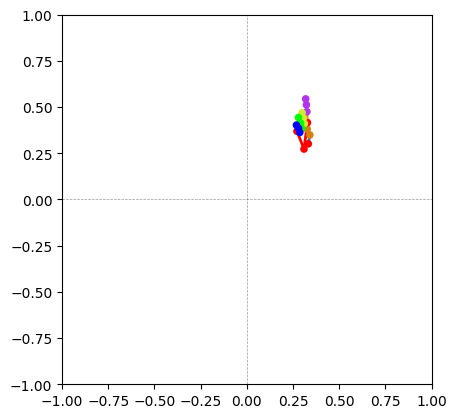

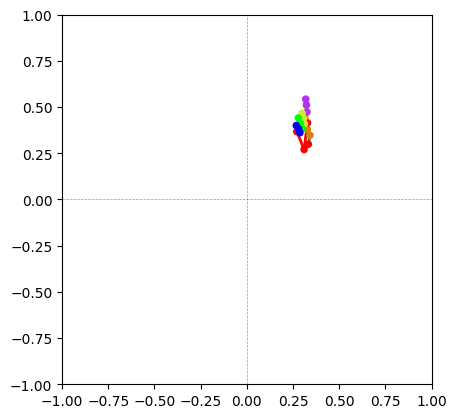

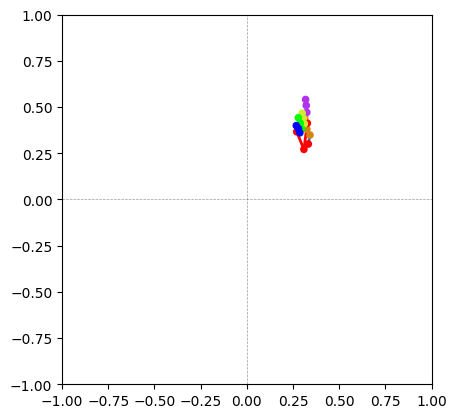

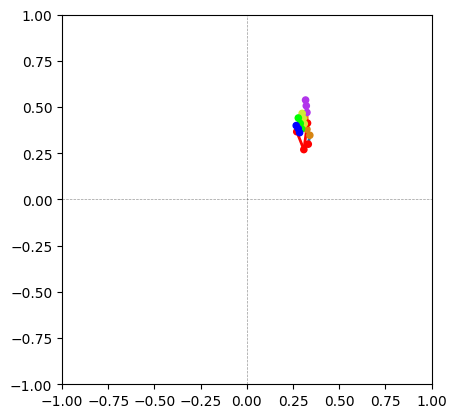

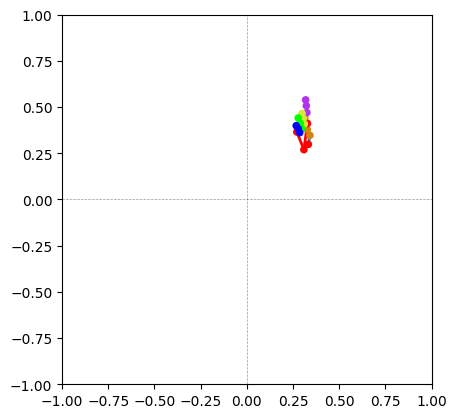

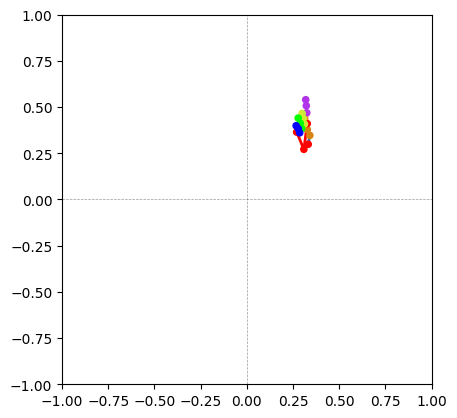

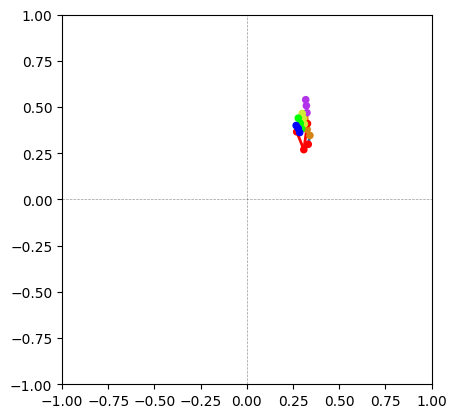

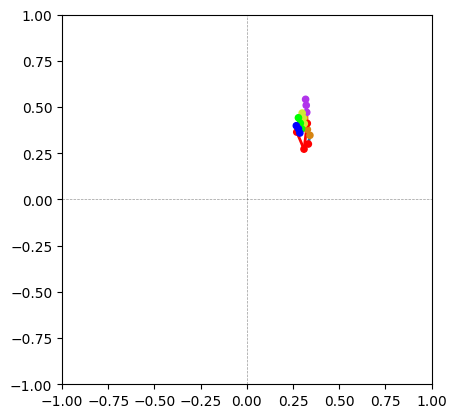

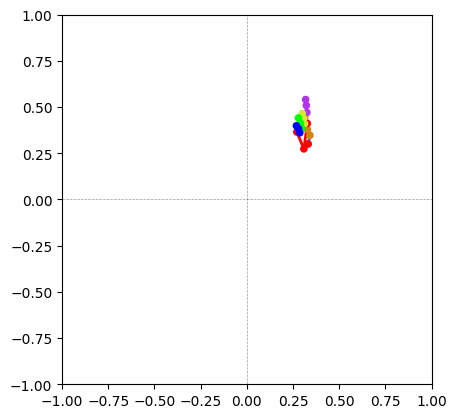

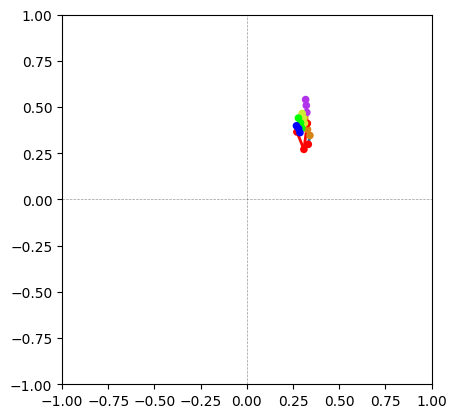

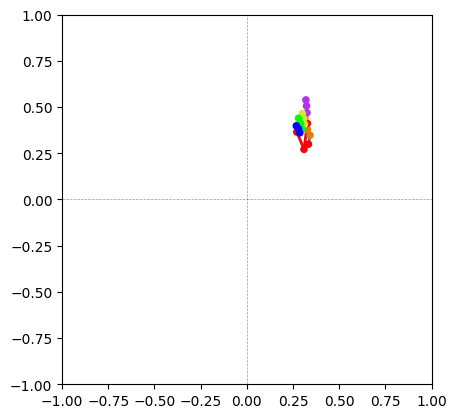

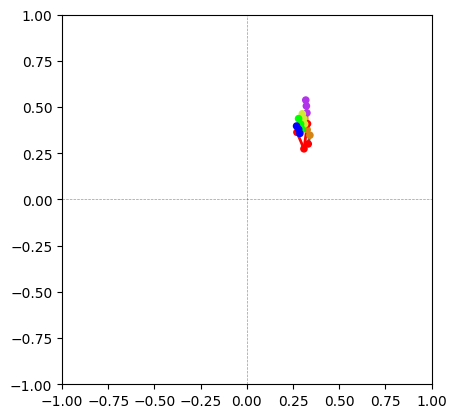

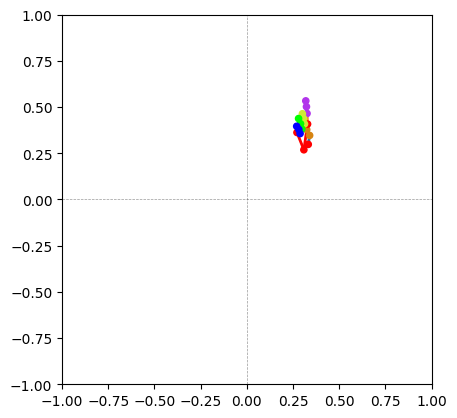

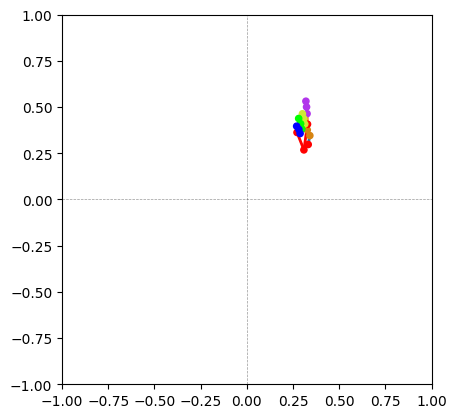

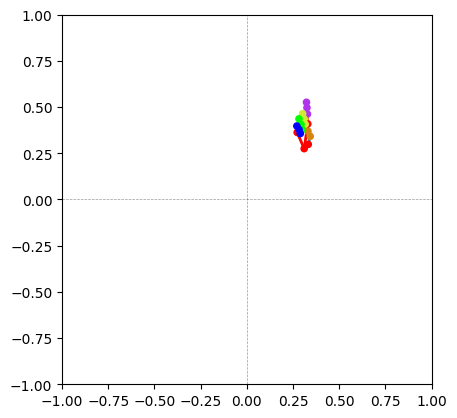

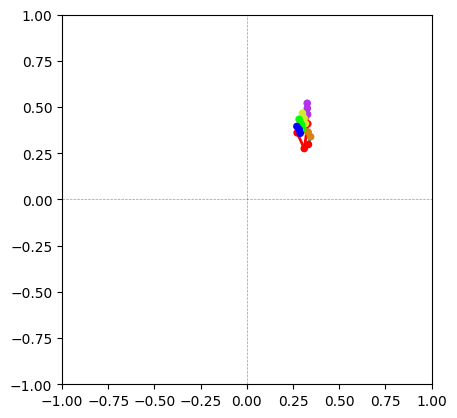

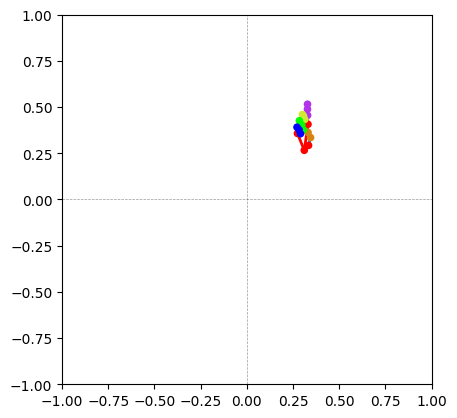

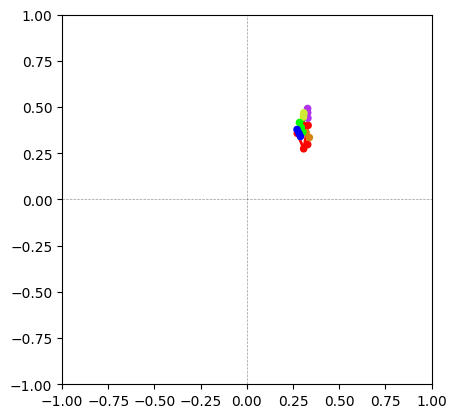

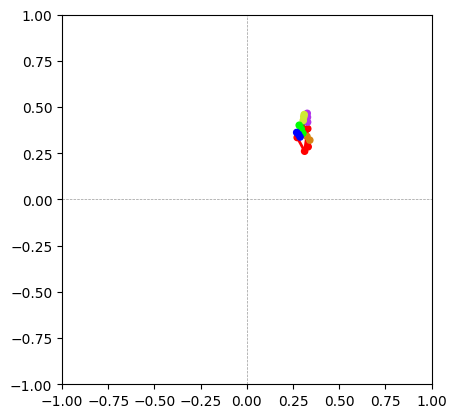

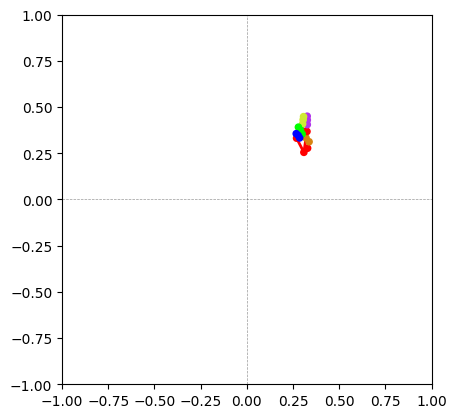

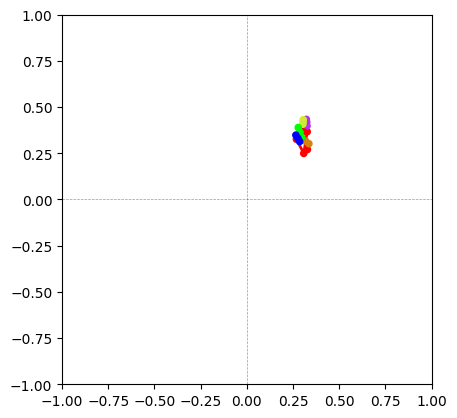

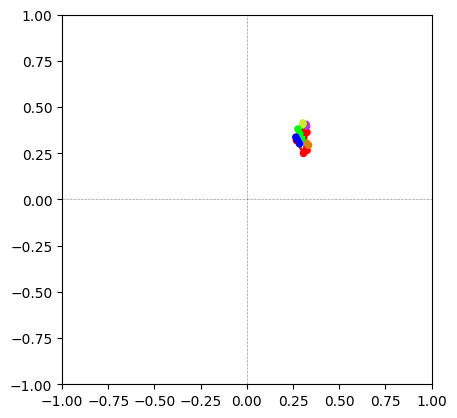

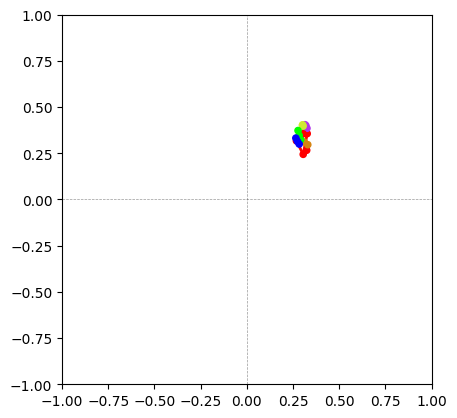

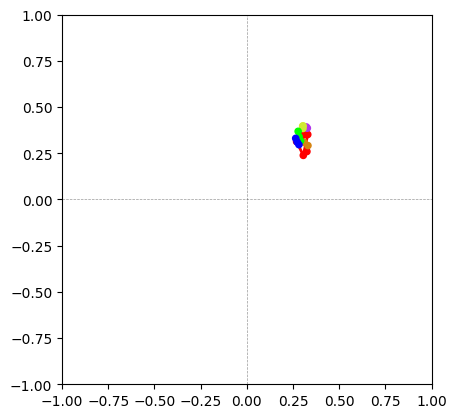

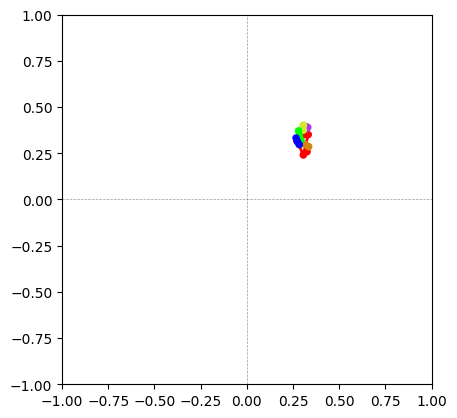

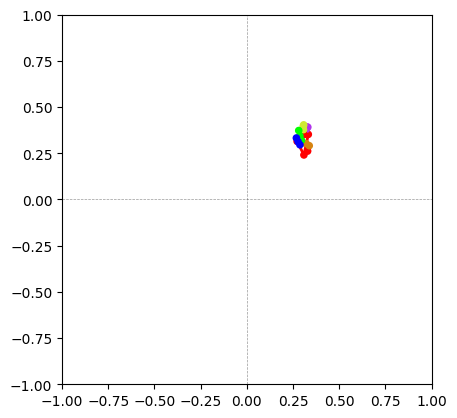

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mpl.use('Agg')

CONNECTIONS = [
    [(0, 4), (5, 8), (9, 12), (13, 16), (17, 20)],
    [(0, 5), (0, 17), (5, 9), (9, 13), (13, 17)],
]
SCATTER_COLORS = [
    "#ff0000",
    "#ff0000",
    "#d68411",
    "#d68411",
    "#d68411",
    "#ff0000",
    "#b134eb",
    "#b134eb",
    "#b134eb",
    "#ff0000",
    "#cfeb34",
    "#cfeb34",
    "#cfeb34",
    "#ff0000",
    "#00ff00",
    "#00ff00",
    "#00ff00",
    "#ff0000",
    "#0000ff",
    "#0000ff",
    "#0000ff",
]


GESTURE_CLASS = 4


def plot_landmarks(x: np.ndarray, y: np.ndarray, ax: plt.Axes):
    for connection in CONNECTIONS[0]:
        ax.plot(
            x[connection[0] : connection[1] + 1],
            y[connection[0] : connection[1] + 1],
            zorder=0,
            linewidth=2,
        )
    for connection in CONNECTIONS[1]:
        ax.plot(
            [x[connection[0]], x[connection[1]]],
            [y[connection[0]], y[connection[1]]],
            c="#ff0000",
            zorder=0,
            linewidth=2,
        )

    ax.scatter(x, y, c=SCATTER_COLORS, s=20)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_aspect("equal")
    ax.axhline(0, color="black", linewidth=.5, alpha=.4, linestyle='--')
    ax.axvline(0, color="black", linewidth=.5, alpha=.4, linestyle='--')


# Load the data
df = pd.read_csv(
    "/mnt/RESOURCES/josemanuelbravo/GestureRecognitionSystem/data/IPN_Hand/annotations/Annot_TrainList.txt"
)

# Filter the data
df = df[df["label"] == GESTURE_CLASS]

gesture = df.iloc[100]
video_name = gesture["video_name"]
first_frame = gesture["first_frame"]
last_frame = gesture["last_frame"]
duration = last_frame - first_frame

landmarks = pd.read_csv(
    os.path.join(
        "/home/josemanuelbravo/Escritorio/GestureRecognitionSystem/features/IPN_Hand/pose_features_w_interp",
        f"{video_name}_poses_landamarks.csv",
    )
).to_numpy()[first_frame - 1 : last_frame]

for i in range(landmarks.shape[0]):
    fig, ax = plt.subplots()
    plot_landmarks(landmarks[i, 0::2], landmarks[i, 1::2], ax)
    plt.savefig(f"temp/landmarks_{i}.png")